#Imports


In [ ]:
!pip install pmdarima

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install dtale

In [ ]:
pip install cmake

In [ ]:
pip install pystan

In [ ]:
pip install wheel setuptools

In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
from prophet import  Prophet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')



#Loading data

In [ ]:
df = pd.read_excel('/content/Women Athletic Wear.xlsx')

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
1,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129937.5,0.35,Outlet
2,Foot Locker,1185732,2020-01-28,Northeast,New York,New York,Women's Athletic Footwear,45,800,360000,126000.0,0.35,Outlet
3,Foot Locker,1185732,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129937.5,0.35,Outlet
4,Foot Locker,1185732,2020-02-09,Northeast,New York,New York,Women's Athletic Footwear,50,850,425000,148750.0,0.35,Outlet


#Business Goal

To build a model that can predict sales of Adidas product provided the range of dates

#Data Preprocessing

Removing delimiters

In [ ]:
# df = df.replace(',', '', regex = True)
# df['Price per Unit'] = str(df['Price per Unit'])
# df['Operating Profit'] = str(df['Operating Profit'])
# df['Units Sold'] = str(df['Units Sold'])
# df['Total Sales'] = str(df['Total Sales'])
# df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
# df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
# df['Units Sold'] = df['Units Sold'].str.replace('$', '')
# df['Total Sales'] = df['Total Sales'].str.replace('$', '')



Handling categorical values

In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

Converting dataframe to time stamped dataframe

In [ ]:
encoded_df.set_index('Invoice Date', inplace = True)

In [ ]:
encoded_df.index = pd.to_datetime(encoded_df.index)

In [ ]:
encoded_df.sort_index(inplace = True)

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,Foot Locker,1185732,45,850,382500,133875.00,0.35,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-04,Foot Locker,1185732,41,247,10127,4658.42,0.46,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-04,Foot Locker,1185732,36,281,10116,3742.92,0.37,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,45,300,135000,47250.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,34,90,3060,1254.60,0.41,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,Amazon,1185732,42,36,1512,680.40,0.45,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-30,Foot Locker,1185732,60,175,105000,42000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-30,Amazon,1185732,45,125,56250,16875.00,0.30,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
encoded_df = encoded_df.dropna()

#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          1606 non-null   object        
 1   Retailer ID       1606 non-null   int64         
 2   Invoice Date      1606 non-null   datetime64[ns]
 3   Region            1606 non-null   object        
 4   State             1606 non-null   object        
 5   City              1606 non-null   object        
 6   Product           1606 non-null   object        
 7   Price per Unit    1606 non-null   int64         
 8   Units Sold        1606 non-null   int64         
 9   Total Sales       1606 non-null   int64         
 10  Operating Profit  1606 non-null   float64       
 11  Operating Margin  1606 non-null   float64       
 12  Sales Method      1606 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 163.2+ KB


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1606 entries, 2020-01-04 to 2021-12-30
Columns: 118 entries, Retailer to Sales Method_Outlet
dtypes: float64(2), int64(4), object(1), uint8(111)
memory usage: 274.5+ KB


In [ ]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,1.606000e+03,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,1.173752e+06,41.112702,197.531756,66395.950187,24268.857372,0.424359
std,2.641808e+04,13.169884,174.810783,105902.791572,38477.945301,0.087936
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.250000
25%,1.185732e+06,33.000000,75.000000,2925.000000,1291.500000,0.350000
50%,1.185732e+06,40.000000,136.000000,7291.500000,3367.500000,0.410000
75%,1.185732e+06,50.000000,250.000000,100000.000000,33515.625000,0.490000
max,1.197831e+06,90.000000,925.000000,540000.000000,216000.000000,0.750000


In [ ]:
encoded_df.dtypes

Retailer                             object
Retailer ID                           int64
Price per Unit                        int64
Units Sold                            int64
Total Sales                           int64
                                      ...  
City_Wilmington                       uint8
Product_Women's Athletic Footwear     uint8
Sales Method_In-store                 uint8
Sales Method_Online                   uint8
Sales Method_Outlet                   uint8
Length: 118, dtype: object

Missing Values

In [ ]:
encoded_df.isnull().sum()

Retailer                             0
Retailer ID                          0
Price per Unit                       0
Units Sold                           0
Total Sales                          0
                                    ..
City_Wilmington                      0
Product_Women's Athletic Footwear    0
Sales Method_In-store                0
Sales Method_Online                  0
Sales Method_Outlet                  0
Length: 118, dtype: int64

In [ ]:
encoded_df.dropna(inplace=True)

In [ ]:
city_names = df.City.value_counts().index

In [ ]:
city_names

Index(['Portland', 'Charleston', 'Orlando', 'Salt Lake City', 'Houston',
       'Boise', 'Phoenix', 'Albuquerque', 'Atlanta', 'New York', 'Jackson',
       'Little Rock', 'Oklahoma City', 'Hartford', 'Providence', 'Boston',
       'Burlington', 'Richmond', 'New Orleans', 'Manchester', 'Dallas',
       'Philadelphia', 'Knoxville', 'Birmingham', 'Las Vegas', 'Los Angeles',
       'San Francisco', 'Chicago', 'Newark', 'Baltimore', 'Indianapolis',
       'Milwaukee', 'Des Moines', 'Fargo', 'Sioux Falls', 'Wichita',
       'Wilmington', 'Honolulu', 'Albany', 'Louisville', 'Columbus',
       'Charlotte', 'Seattle', 'Miami', 'Minneapolis', 'Billings', 'Omaha',
       'St. Louis', 'Detroit', 'Cheyenne', 'Denver', 'Anchorage'],
      dtype='object')

In [ ]:
city_values = df.City.value_counts().values

In [ ]:
city_values

array([60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       22])

In [ ]:
region_names = df.Region.value_counts().index

<Figure size 1000x1000 with 0 Axes>

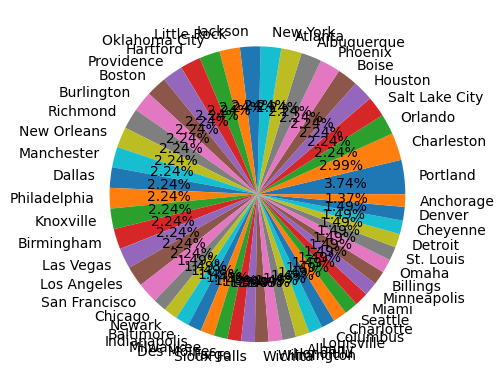

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.pie(city_values,labels = city_names,autopct = '%1.2f%%')
plt.figure(figsize=(10, 10))

In [ ]:
corr=df.corr()
corr

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.462688,-0.048510,-0.119661,-0.068988,0.241586
Price per Unit,-0.462688,1.000000,0.344536,0.460279,0.433661,-0.181373
Units Sold,-0.048510,0.344536,1.000000,0.920376,0.911137,-0.344009
Total Sales,-0.119661,0.460279,0.920376,1.000000,0.973525,-0.419779
Operating Profit,-0.068988,0.433661,0.911137,0.973525,1.000000,-0.317143
Operating Margin,0.241586,-0.181373,-0.344009,-0.419779,-0.317143,1.000000


In [ ]:
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)

<Axes: >

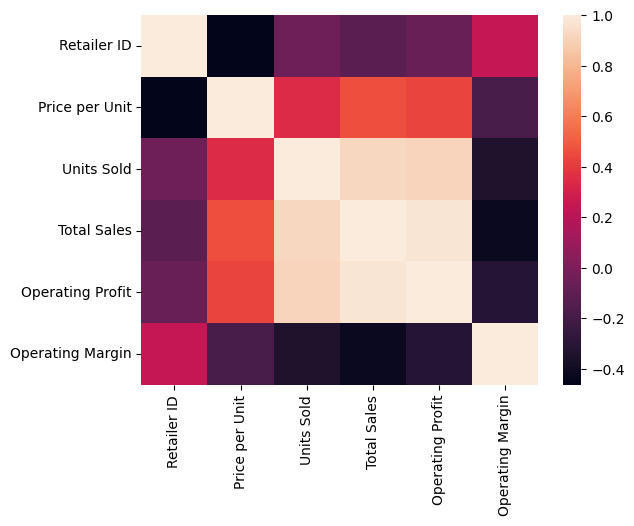

In [ ]:
sns.heatmap(df.corr())

#Automated EDA

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,Foot Locker,1185732,45,850,382500,133875.00,0.35,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-04,Foot Locker,1185732,41,247,10127,4658.42,0.46,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-04,Foot Locker,1185732,36,281,10116,3742.92,0.37,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,45,300,135000,47250.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,34,90,3060,1254.60,0.41,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,Amazon,1185732,42,36,1512,680.40,0.45,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-30,Foot Locker,1185732,60,175,105000,42000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-30,Amazon,1185732,45,125,56250,16875.00,0.30,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
report = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)
report.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import dtale
import dtale.app as dtale_app
dtale.app.USE_COLAB = True

In [ ]:
dtale.show(df)

https://x94azfry4zi-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,Foot Locker,1185732,45,850,382500,133875.00,0.35,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-04,Foot Locker,1185732,41,247,10127,4658.42,0.46,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-04,Foot Locker,1185732,36,281,10116,3742.92,0.37,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,45,300,135000,47250.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-05,West Gear,1128299,34,90,3060,1254.60,0.41,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,Amazon,1185732,42,36,1512,680.40,0.45,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-30,Foot Locker,1185732,60,175,105000,42000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-30,Amazon,1185732,45,125,56250,16875.00,0.30,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#Stationarity Check

In [ ]:
encoded_df = encoded_df.resample(rule = 'W').mean()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
len(encoded_df)

105

In [ ]:
adf_test(encoded_df['Total Sales'][:80])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.502310
p-value                  0.007928
# lags used              0.000000
# observations          78.000000
critical value (1%)     -3.517114
critical value (5%)     -2.899375
critical value (10%)    -2.586955
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
encoded_df = encoded_df[:80]

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
encoded_df.dropna(inplace = True)

In [ ]:
encoded_df

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1.157016e+06,40.666667,309.166667,90757.333333,32108.573333,0.406667,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-12,1.128299e+06,39.666667,144.666667,43185.333333,15285.253333,0.406667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-19,1.128299e+06,48.666667,159.000000,57671.000000,20429.110000,0.410000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-26,1.157016e+06,46.666667,290.666667,96045.833333,33984.340000,0.406667,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-02-02,1.157016e+06,47.166667,291.833333,94465.500000,35075.850000,0.435000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13,1.177286e+06,39.588235,200.088235,69370.647059,23416.691765,0.417353,0.352941,0.294118,0.000000,0.147059,...,0.0,0.0,0.058824,0.000000,0.000000,0.000000,1.0,0.235294,0.558824,0.205882
2021-06-20,1.174684e+06,47.000000,198.896552,77879.827586,27883.110000,0.415172,0.344828,0.344828,0.206897,0.103448,...,0.0,0.0,0.000000,0.068966,0.068966,0.068966,1.0,0.241379,0.517241,0.241379
2021-06-27,1.165179e+06,47.000000,175.200000,67340.900000,24086.829333,0.428333,0.200000,0.066667,0.200000,0.166667,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.100000,0.566667,0.333333


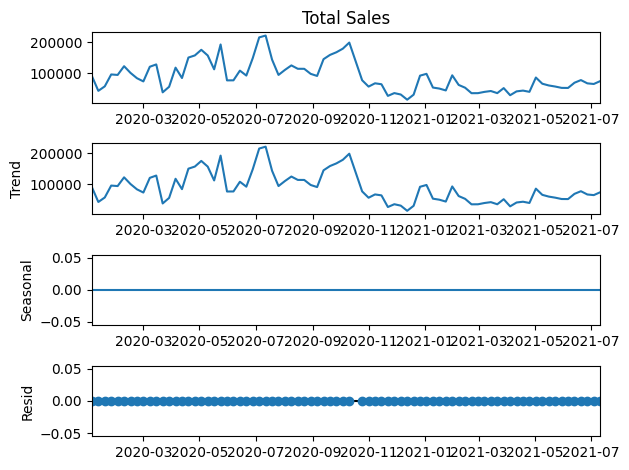

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'additive',period = 1)
result.plot();

#SMA

In [ ]:
encoded_df['2-week-SMA'] = encoded_df['Total Sales'].rolling(window = 2).mean()
encoded_df['3-week-SMA'] = encoded_df['Total Sales'].rolling(window = 3).mean()

In [ ]:
encoded_df['2-week-SMA']

Invoice Date
2020-01-05             NaN
2020-01-12    66971.333333
2020-01-19    50428.166667
2020-01-26    76858.416667
2020-02-02    95255.666667
                  ...     
2021-06-13    60963.264706
2021-06-20    73625.237323
2021-06-27    72610.363793
2021-07-04    66334.268182
2021-07-11    69967.476077
Name: 2-week-SMA, Length: 79, dtype: float64

In [ ]:
encoded_df['3-week-SMA']

Invoice Date
2020-01-05             NaN
2020-01-12             NaN
2020-01-19    63871.222222
2020-01-26    65634.055556
2020-02-02    82727.444444
                  ...     
2021-06-13    58227.793137
2021-06-20    66602.118999
2021-06-27    71530.458215
2021-07-04    70182.787983
2021-07-11    69091.950718
Name: 3-week-SMA, Length: 79, dtype: float64

<Axes: xlabel='Invoice Date'>

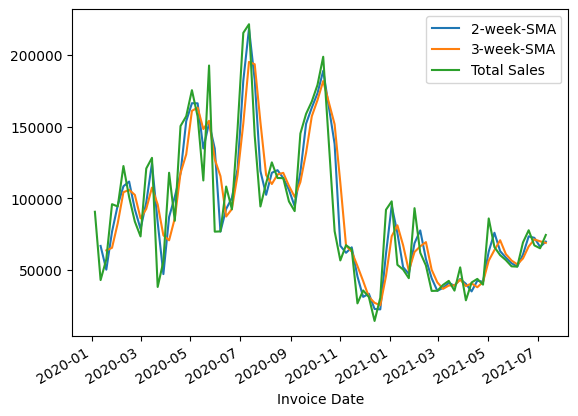

In [ ]:
encoded_df['2-week-SMA'].plot(legend = True)
encoded_df['3-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

In [ ]:
encoded_df['6-week-SMA'] = encoded_df['Total Sales'].rolling(window = 6).mean()
encoded_df['12-week-SMA'] = encoded_df['Total Sales'].rolling(window = 12).mean()

<Axes: xlabel='Invoice Date'>

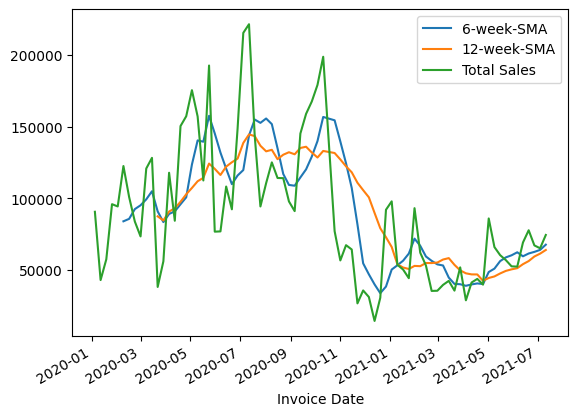

In [ ]:
encoded_df['6-week-SMA'].plot(legend = True)
encoded_df['12-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

#EWMA

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.


The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(span = 2).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    90757.333333
2020-01-12    55078.333333
2020-01-19    56873.256410
2020-01-26    83314.745833
2020-02-02    90779.300275
                  ...     
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11    71957.021986
Name: EWMA, Length: 79, dtype: float64

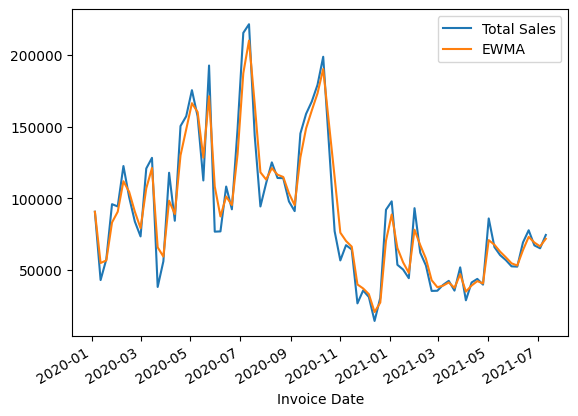

In [ ]:
encoded_df['Total Sales'].plot(legend = True);
encoded_df['EWMA'].plot(legend = True);

#Evaluation Metrics

SMA

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

18361.904902345173

In [ ]:
mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

636352404.0108281

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:]))

25226.02632224957

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

12349.478255701924

In [ ]:
mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

323715803.6620116

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:]))

17992.103925389372

EWMA Evaluation

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    90757.333333
2020-01-12    55078.333333
2020-01-19    56873.256410
2020-01-26    83314.745833
2020-02-02    90779.300275
                  ...     
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11    71957.021986
Name: EWMA, Length: 79, dtype: float64

In [ ]:
test_data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-05-16,1.180680e+06,40.425000,189.925000,60553.300000,22731.786250,0.426500,0.250000,0.200000,0.150000,0.075000,...,0.050000,1.0,0.200000,0.500000,0.300000,63363.575926,70942.929405,56395.305277,47803.465780,62964.650143
2021-05-23,1.178525e+06,41.677419,173.258065,57096.064516,22265.096774,0.438065,0.064516,0.225806,0.387097,0.161290,...,0.000000,1.0,0.161290,0.483871,0.354839,58824.682258,61274.405456,58992.876215,49581.183656,59052.259725
2021-05-30,1.151887e+06,41.050000,161.450000,52756.850000,18802.566500,0.420000,0.100000,0.000000,0.150000,0.150000,...,0.000000,1.0,0.100000,0.450000,0.450000,54926.457258,56802.071505,60450.975147,50657.149417,54855.319908
2021-06-06,1.187867e+06,36.588235,163.529412,52555.882353,20762.635882,0.428824,0.352941,0.176471,0.000000,0.117647,...,0.000000,1.0,0.176471,0.529412,0.294118,52656.366176,54136.265623,62539.597514,51482.732470,53322.361538
2021-06-13,1.177286e+06,39.588235,200.088235,69370.647059,23416.691765,0.417353,0.352941,0.294118,0.000000,0.147059,...,0.000000,1.0,0.235294,0.558824,0.205882,60963.264706,58227.793137,59751.099297,54276.297966,64021.218552
2021-06-20,1.174684e+06,47.000000,198.896552,77879.827586,27883.110000,0.415172,0.344828,0.344828,0.206897,0.103448,...,0.068966,1.0,0.241379,0.517241,0.241379,73625.237323,66602.118999,61702.095252,56428.491931,73260.291241
2021-06-27,1.165179e+06,47.000000,175.200000,67340.900000,24086.829333,0.428333,0.200000,0.066667,0.200000,0.166667,...,0.000000,1.0,0.100000,0.566667,0.333333,72610.363793,71530.458215,62833.361919,59614.333598,69314.030414
2021-07-04,1.185732e+06,41.090909,181.454545,65327.636364,24517.038182,0.416364,0.545455,0.272727,0.000000,0.181818,...,0.000000,1.0,0.181818,0.545455,0.272727,66334.268182,70182.787983,64205.290560,61599.083388,66656.434380
2021-07-11,1.183664e+06,41.236842,201.789474,74607.315789,26056.852895,0.427368,0.421053,0.263158,0.000000,0.052632,...,0.000000,1.0,0.236842,0.552632,0.210526,69967.476077,69091.950718,67847.034859,64149.005003,71957.021986


In [ ]:
mean_absolute_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11'])

2572.6312811914486

In [ ]:
mean_squared_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11'])

8585764.659784846

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11']))

2930.147549149163

In [ ]:
encoded_df['Total Sales'].mean()

88816.00570100691

#Holt Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 2
alpha = 2 / (span + 1)

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(alpha = alpha, adjust = False).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    90757.333333
2020-01-12    59042.666667
2020-01-19    58128.222222
2020-01-26    83406.629630
2020-02-02    90779.209877
                  ...     
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11    71957.021986
Name: EWMA, Length: 79, dtype: float64

In [ ]:
model = SimpleExpSmoothing(encoded_df['Total Sales'])

In [ ]:
encoded_df['Total Sales']

Invoice Date
2020-01-05    90757.333333
2020-01-12    43185.333333
2020-01-19    57671.000000
2020-01-26    96045.833333
2020-02-02    94465.500000
                  ...     
2021-06-13    69370.647059
2021-06-20    77879.827586
2021-06-27    67340.900000
2021-07-04    65327.636364
2021-07-11    74607.315789
Name: Total Sales, Length: 79, dtype: float64

In [ ]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
encoded_df['SES7'] = fitted_model.fittedvalues.shift(-1)

In [ ]:
encoded_df['SES7']

Invoice Date
2020-01-05    90757.333333
2020-01-12    59042.666667
2020-01-19    58128.222222
2020-01-26    83406.629630
2020-02-02    90779.209877
                  ...     
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11             NaN
Name: SES7, Length: 79, dtype: float64

Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
encoded_df['DES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add').fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

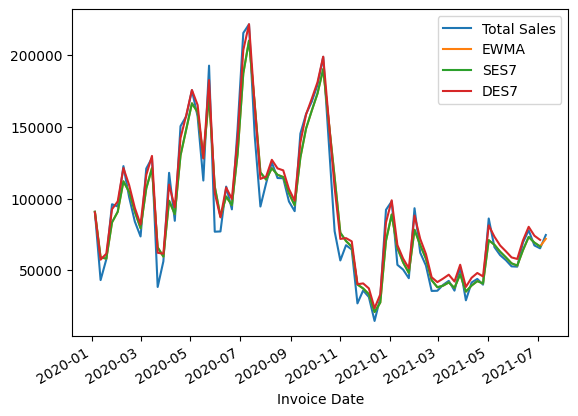

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7']].plot()


In [ ]:
len(encoded_df)

79

In [ ]:
train_data = encoded_df.iloc[:70]
test_data = encoded_df.iloc[70:]

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

79    71957.021986
80    71957.021986
81    71957.021986
82    71957.021986
83    71957.021986
84    71957.021986
dtype: float64

Triple Exponential Smoothing

In [ ]:
encoded_df['TES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add', seasonal_periods = 1).fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

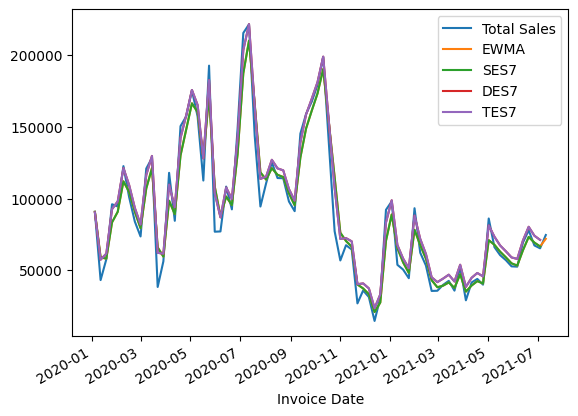

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7', 'TES7']].plot()

#Evaluation Metrics

Triple Exponential Smoothing

In [ ]:
fitted_model  =  ExponentialSmoothing(train_data['Total Sales'], trend = 'add', seasonal_periods = 1).fit()

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

70    73560.175315
71    77522.318026
72    81484.460738
73    85446.603449
74    89408.746160
75    93370.888872
dtype: float64

In [ ]:
 train_data['Total Sales']


Invoice Date
2020-01-05    90757.333333
2020-01-12    43185.333333
2020-01-19    57671.000000
2020-01-26    96045.833333
2020-02-02    94465.500000
                  ...     
2021-04-11    41510.638889
2021-04-18    44008.256410
2021-04-25    40024.148148
2021-05-02    86101.636364
2021-05-09    66173.851852
Name: Total Sales, Length: 70, dtype: float64

In [ ]:
test_predictions

70    73560.175315
71    77522.318026
72    81484.460738
73    85446.603449
74    89408.746160
75    93370.888872
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
test_data['Total Sales'][:6]

Invoice Date
2021-05-16    60553.300000
2021-05-23    57096.064516
2021-05-30    52756.850000
2021-06-06    52555.882353
2021-06-13    69370.647059
2021-06-20    77879.827586
Name: Total Sales, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],test_predictions)

21763.436840933045

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],test_predictions)

522497364.362503

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],test_predictions))


22858.20124949693

EWMA Evaluation

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    90757.333333
2020-01-12    59042.666667
2020-01-19    58128.222222
2020-01-26    83406.629630
2020-02-02    90779.209877
                  ...     
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11    71957.021986
Name: EWMA, Length: 79, dtype: float64

In [ ]:
test_data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA,SES7,DES7
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-05-16,1.180680e+06,40.425000,189.925000,60553.300000,22731.786250,0.426500,0.250000,0.200000,0.150000,0.075000,...,0.200000,0.500000,0.300000,63363.575926,70942.929405,56395.305277,47803.465780,62964.650143,62964.650143,67308.552032
2021-05-23,1.178525e+06,41.677419,173.258065,57096.064516,22265.096774,0.438065,0.064516,0.225806,0.387097,0.161290,...,0.161290,0.483871,0.354839,58824.682258,61274.405456,58992.876215,49581.183656,59052.259725,59052.259725,63273.955287
2021-05-30,1.151887e+06,41.050000,161.450000,52756.850000,18802.566500,0.420000,0.100000,0.000000,0.150000,0.150000,...,0.100000,0.450000,0.450000,54926.457258,56802.071505,60450.975147,50657.149417,54855.319908,54855.319908,59000.063005
2021-06-06,1.187867e+06,36.588235,163.529412,52555.882353,20762.635882,0.428824,0.352941,0.176471,0.000000,0.117647,...,0.176471,0.529412,0.294118,52656.366176,54136.265623,62539.597514,51482.732470,53322.361538,53322.361538,57914.184379
2021-06-13,1.177286e+06,39.588235,200.088235,69370.647059,23416.691765,0.417353,0.352941,0.294118,0.000000,0.147059,...,0.235294,0.558824,0.205882,60963.264706,58227.793137,59751.099297,54276.297966,64021.218552,64021.218552,70842.849124
2021-06-20,1.174684e+06,47.000000,198.896552,77879.827586,27883.110000,0.415172,0.344828,0.344828,0.206897,0.103448,...,0.241379,0.517241,0.241379,73625.237323,66602.118999,61702.095252,56428.491931,73260.291241,73260.291241,80312.239977
2021-06-27,1.165179e+06,47.000000,175.200000,67340.900000,24086.829333,0.428333,0.200000,0.066667,0.200000,0.166667,...,0.100000,0.566667,0.333333,72610.363793,71530.458215,62833.361919,59614.333598,69314.030414,69314.030414,74116.960352
2021-07-04,1.185732e+06,41.090909,181.454545,65327.636364,24517.038182,0.416364,0.545455,0.272727,0.000000,0.181818,...,0.181818,0.545455,0.272727,66334.268182,70182.787983,64205.290560,61599.083388,66656.434380,66656.434380,71194.913737
2021-07-11,1.183664e+06,41.236842,201.789474,74607.315789,26056.852895,0.427368,0.421053,0.263158,0.000000,0.052632,...,0.236842,0.552632,0.210526,69967.476077,69091.950718,67847.034859,64149.005003,71957.021986,NaN,NaN


In [ ]:
mean_absolute_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11'])

2572.631281191445

In [ ]:
mean_squared_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11'])

8585764.65978483

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'],encoded_df['EWMA']['2021-05-16':'2021-07-11']))

2930.14754914916

In [ ]:
encoded_df['Total Sales'].mean()

88816.00570100691

SES Evaluation

In [ ]:
encoded_df['SES7']['2021-05-16':'2021-07-11']

Invoice Date
2021-05-16    62964.650143
2021-05-23    59052.259725
2021-05-30    54855.319908
2021-06-06    53322.361538
2021-06-13    64021.218552
2021-06-20    73260.291241
2021-06-27    69314.030414
2021-07-04    66656.434380
2021-07-11             NaN
Name: SES7, dtype: float64

In [ ]:
test_data['Total Sales']

Invoice Date
2021-05-16    60553.300000
2021-05-23    57096.064516
2021-05-30    52756.850000
2021-06-06    52555.882353
2021-06-13    69370.647059
2021-06-20    77879.827586
2021-06-27    67340.900000
2021-07-04    65327.636364
2021-07-11    74607.315789
Name: Total Sales, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-05-16':'2021-07-04'])

2562.923465960729

In [ ]:
mean_squared_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-05-16':'2021-07-04'])

8780978.086955776

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-05-16':'2021-07-04']))

2963.2715175892636

In [ ]:
encoded_df['Total Sales'].mean()

88816.00570100691

DES Evaluation


In [ ]:
mean_absolute_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-05-16':'2021-07-04'])

5135.326251965037

In [ ]:
mean_squared_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-05-16':'2021-07-04'])

29989102.532214817

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-05-16':'2021-07-04']))

5476.230686541137

In [ ]:
encoded_df['Total Sales'].mean()

88816.00570100691

#Check for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(encoded_df['Total Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.502310
p-value                  0.007928
# lags used              0.000000
# observations          78.000000
critical value (1%)     -3.517114
critical value (5%)     -2.899375
critical value (10%)    -2.586955
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#AR,ARIMA

AR(1)

In [ ]:
len(encoded_df)

79

In [ ]:
auto_arima(encoded_df['Total Sales'] , seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -924.150
Date:                Mon, 07 Aug 2023   AIC                           1854.300
Time:                        06:59:17   BIC                           1861.370
Sample:                             0   HQIC                          1857.130
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5495      0.192      2.865      0.004       0.174       0.925
ma.L1         -0.8617      0.114     -7.560      0.000      -1.085      -0.638
sigma2      1.259e+09   5.17e-11   2.43e+19      0.000    1.26e+09    1.26e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 3.57
Prob(Q):                              0.60   Prob(JB):                         0.17
Heteroskedasticity (H):               0.14   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+35. Standard errors may be unstable.
"""

In [ ]:
train_data = encoded_df.iloc[:70]
test_data = encoded_df.iloc[70:]

In [ ]:
test_data


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA,SES7,DES7,TES7
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-05-16,1.180680e+06,40.425000,189.925000,60553.300000,22731.786250,0.426500,0.250000,0.200000,0.150000,0.075000,...,0.500000,0.300000,63363.575926,70942.929405,56395.305277,47803.465780,62964.650143,62964.650143,67308.552032,67308.552032
2021-05-23,1.178525e+06,41.677419,173.258065,57096.064516,22265.096774,0.438065,0.064516,0.225806,0.387097,0.161290,...,0.483871,0.354839,58824.682258,61274.405456,58992.876215,49581.183656,59052.259725,59052.259725,63273.955287,63273.955287
2021-05-30,1.151887e+06,41.050000,161.450000,52756.850000,18802.566500,0.420000,0.100000,0.000000,0.150000,0.150000,...,0.450000,0.450000,54926.457258,56802.071505,60450.975147,50657.149417,54855.319908,54855.319908,59000.063005,59000.063005
2021-06-06,1.187867e+06,36.588235,163.529412,52555.882353,20762.635882,0.428824,0.352941,0.176471,0.000000,0.117647,...,0.529412,0.294118,52656.366176,54136.265623,62539.597514,51482.732470,53322.361538,53322.361538,57914.184379,57914.184379
2021-06-13,1.177286e+06,39.588235,200.088235,69370.647059,23416.691765,0.417353,0.352941,0.294118,0.000000,0.147059,...,0.558824,0.205882,60963.264706,58227.793137,59751.099297,54276.297966,64021.218552,64021.218552,70842.849124,70842.849124
2021-06-20,1.174684e+06,47.000000,198.896552,77879.827586,27883.110000,0.415172,0.344828,0.344828,0.206897,0.103448,...,0.517241,0.241379,73625.237323,66602.118999,61702.095252,56428.491931,73260.291241,73260.291241,80312.239977,80312.239977
2021-06-27,1.165179e+06,47.000000,175.200000,67340.900000,24086.829333,0.428333,0.200000,0.066667,0.200000,0.166667,...,0.566667,0.333333,72610.363793,71530.458215,62833.361919,59614.333598,69314.030414,69314.030414,74116.960352,74116.960352
2021-07-04,1.185732e+06,41.090909,181.454545,65327.636364,24517.038182,0.416364,0.545455,0.272727,0.000000,0.181818,...,0.545455,0.272727,66334.268182,70182.787983,64205.290560,61599.083388,66656.434380,66656.434380,71194.913737,71194.913737
2021-07-11,1.183664e+06,41.236842,201.789474,74607.315789,26056.852895,0.427368,0.421053,0.263158,0.000000,0.052632,...,0.552632,0.210526,69967.476077,69091.950718,67847.034859,64149.005003,71957.021986,NaN,NaN,NaN


In [ ]:
model = AutoReg(train_data['Total Sales'], lags=1)
AR1fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

predictions1 = AR1fit.predict(start, end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

70    73334.044412
71    78438.931470
72    82078.480499
73    84673.311096
74    86523.305635
75    87842.266417
76    88782.624622
77    89453.056653
78    89931.043769
Name: AR(1) Predictions, dtype: float64

In [ ]:
date_range = pd.date_range(start='2021-05-16', periods=9, freq='W')


In [ ]:
series = pd.Series(data=predictions1.values, index=date_range)

In [ ]:
predictions1 = series.rename('AR(1)')

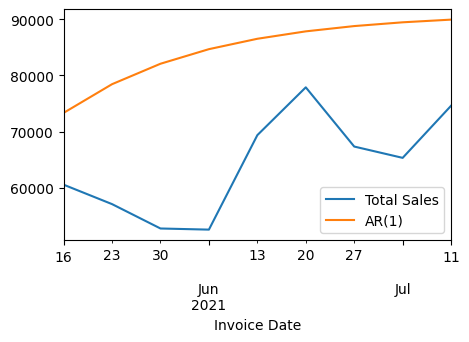

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(5,3));

AR(2) Model

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=2)
AR2fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions2 = AR2fit.predict(start,end, dynamic=False).rename('AR(2) Predictions')

In [ ]:
series1 = pd.Series(data=predictions1.values, index=date_range)

In [ ]:
predictions2 = series1.rename('AR(2)')

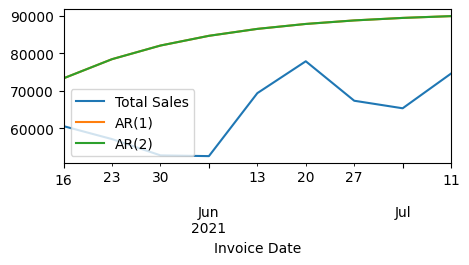

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(5,2));

AR(p) model where statsmodels chooses p

In [ ]:
for i in range(1,10):
  model = AutoReg(train_data['Total Sales'], lags=i)
  ARfit = model.fit()
  predictions = ARfit.predict(start=start, end=end, dynamic=False)
  error = np.sqrt(mean_squared_error(test_data['Total Sales'], predictions))
  print(f'Lag {i} Error : {error}')
  min_error = float('inf')
  min_error = min(min_error, error)

print(min_error)



Lag 1 Error : 21551.531586298024
Lag 2 Error : 23339.852007834223
Lag 3 Error : 20182.43925943276
Lag 4 Error : 20829.416770818043
Lag 5 Error : 17258.175993411525
Lag 6 Error : 14700.179068414363
Lag 7 Error : 10259.689161067234
Lag 8 Error : 16380.937040614983
Lag 9 Error : 9938.542902000612
9938.542902000612


In [ ]:
model = AutoReg(train_data['Total Sales'], lags=9)
AR9fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions9 = AR9fit.predict(start=start, end=end, dynamic=False).rename('AR(9)')

In [ ]:
series2 = pd.Series(data=predictions9.values, index=date_range)

In [ ]:
predictions9 = series2.rename('AR(9)')

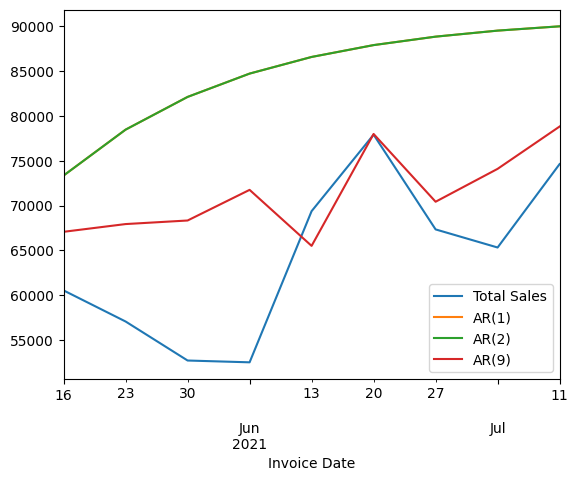

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True);
predictions9.plot(legend=True);

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(9)']
preds = [predictions1, predictions2, predictions9]

for i in range(3):
    error = np.sqrt(mean_squared_error(test_data['Total Sales'], preds[i]))
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 21551.531586298024
AR(2) Error: 21551.531586298024
AR(9) Error: 9938.542902000612


Forecast

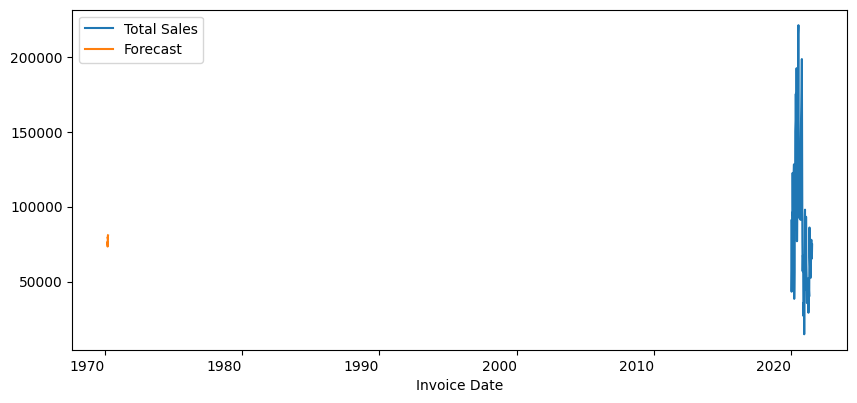

In [ ]:
model = AutoReg(encoded_df['Total Sales'], lags = 9)
ARfit = model.fit()
fcast = ARfit.predict(start=len(encoded_df), end=len(encoded_df)+ 10, dynamic=False).rename('Forecast')
encoded_df['Total Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(10,5));

In [ ]:
fcast

79    74447.453457
80    73374.146166
81    76531.801391
82    76681.367888
83    75137.138509
84    77205.513355
85    79796.660899
86    78796.299193
87    79215.016128
88    80857.036465
89    80901.656630
Name: Forecast, dtype: float64

ARIMA

In [ ]:
auto_arima(encoded_df['Total Sales'],seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -924.150
Date:                Mon, 07 Aug 2023   AIC                           1854.300
Time:                        06:59:24   BIC                           1861.370
Sample:                             0   HQIC                          1857.130
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5495      0.192      2.865      0.004       0.174       0.925
ma.L1         -0.8617      0.114     -7.560      0.000      -1.085      -0.638
sigma2      1.259e+09   5.17e-11   2.43e+19      0.000    1.26e+09    1.26e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 3.57
Prob(Q):                              0.60   Prob(JB):                         0.17
Heteroskedasticity (H):               0.14   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+35. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model2 = ARIMA(encoded_df['Total Sales'], order = (1,1,1))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

79

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start,end).rename('ARIMA Model')

<Axes: xlabel='Invoice Date'>

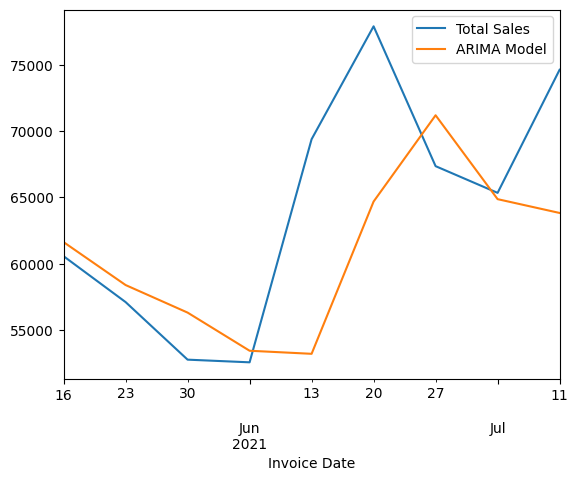

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

8052.197293194643

In [ ]:
test_data['Total Sales'].mean()

64165.38040746785

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10).rename(' ARIMA Forecast')

In [ ]:
predictions

Invoice Date
2021-05-16    61616.002917
2021-05-23    58380.606902
2021-05-30    56303.261149
2021-06-06    53428.511752
2021-06-13    53197.417552
2021-06-20    64673.375162
2021-06-27    71175.243977
2021-07-04    64853.986422
2021-07-11    63813.208408
Name: ARIMA Model, dtype: float64

<Axes: xlabel='Invoice Date'>

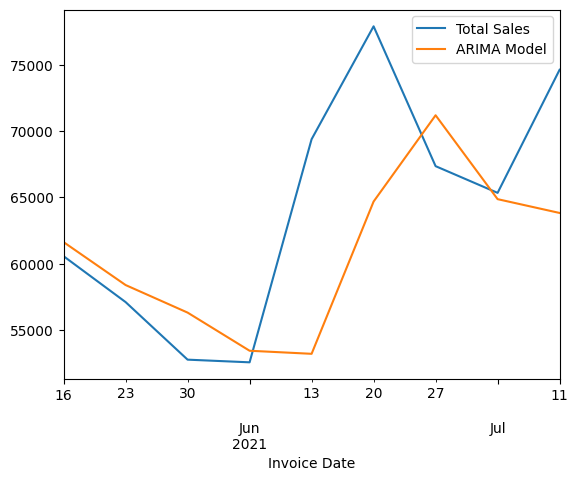

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

#ARIMAX

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
model2 = ARIMA(endog = train_data['Total Sales'],exog = train_data.iloc[:, 7:57],  order = (1,1,1))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

79

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end, exog = test_data.iloc[:, 7:57]).rename('ARIMAX Predictions')

In [ ]:
test_data['Total Sales']

Invoice Date
2021-05-16    60553.300000
2021-05-23    57096.064516
2021-05-30    52756.850000
2021-06-06    52555.882353
2021-06-13    69370.647059
2021-06-20    77879.827586
2021-06-27    67340.900000
2021-07-04    65327.636364
2021-07-11    74607.315789
Name: Total Sales, dtype: float64

In [ ]:
date_range = pd.date_range(start='2021-05-16', end = '2021-07-11', freq='W')

In [ ]:
 predictions = pd.Series(data=predictions.values, index=date_range).rename('ARIMAX')

<Axes: xlabel='Invoice Date'>

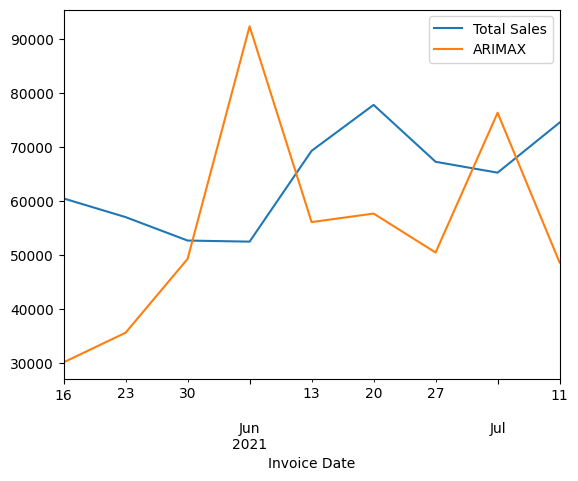

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

22696.564227926105

In [ ]:
test_data['Total Sales'].mean()

64165.38040746785

#SARIMA

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'add', period = 1)

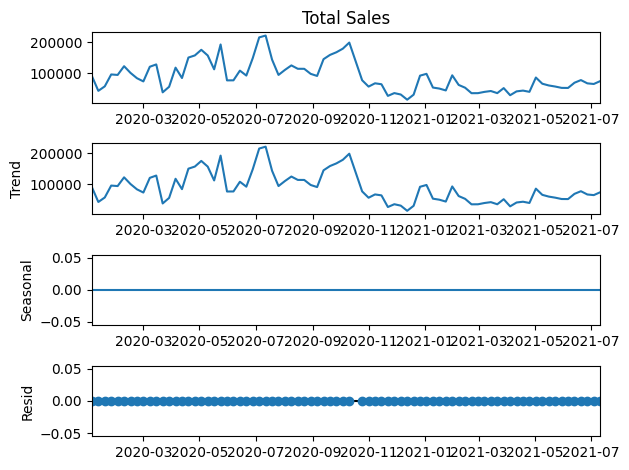

In [ ]:
result.plot();

In [ ]:
model = SARIMAX(train_data['Total Sales'], order = (1, 1, 1))

In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   70
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -821.560
Date:                Mon, 07 Aug 2023   AIC                           1649.121
Time:                        06:59:29   BIC                           1655.823
Sample:                             0   HQIC                          1651.780
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5481      0.217      2.524      0.012       0.122       0.974
ma.L1         -0.8607      0.129     -6.653      0.000      -1.114      -0.607
sigma2      1.423e+09   5.13e-11   2.77e+19      0.000    1.42e+09    1.42e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.62   Prob(JB):                         0.53
Heteroskedasticity (H):               0.29   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+36. Standard errors may be unstable.
"""

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end).rename('SARIMA Predictions')

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
error

11687.426849813264

In [ ]:
test_data['Total Sales'].mean()

64165.38040746785

In [ ]:
test_data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA,SES7,DES7,TES7
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-05-16,1.180680e+06,40.425000,189.925000,60553.300000,22731.786250,0.426500,0.250000,0.200000,0.150000,0.075000,...,0.500000,0.300000,63363.575926,70942.929405,56395.305277,47803.465780,62964.650143,62964.650143,67308.552032,67308.552032
2021-05-23,1.178525e+06,41.677419,173.258065,57096.064516,22265.096774,0.438065,0.064516,0.225806,0.387097,0.161290,...,0.483871,0.354839,58824.682258,61274.405456,58992.876215,49581.183656,59052.259725,59052.259725,63273.955287,63273.955287
2021-05-30,1.151887e+06,41.050000,161.450000,52756.850000,18802.566500,0.420000,0.100000,0.000000,0.150000,0.150000,...,0.450000,0.450000,54926.457258,56802.071505,60450.975147,50657.149417,54855.319908,54855.319908,59000.063005,59000.063005
2021-06-06,1.187867e+06,36.588235,163.529412,52555.882353,20762.635882,0.428824,0.352941,0.176471,0.000000,0.117647,...,0.529412,0.294118,52656.366176,54136.265623,62539.597514,51482.732470,53322.361538,53322.361538,57914.184379,57914.184379
2021-06-13,1.177286e+06,39.588235,200.088235,69370.647059,23416.691765,0.417353,0.352941,0.294118,0.000000,0.147059,...,0.558824,0.205882,60963.264706,58227.793137,59751.099297,54276.297966,64021.218552,64021.218552,70842.849124,70842.849124
2021-06-20,1.174684e+06,47.000000,198.896552,77879.827586,27883.110000,0.415172,0.344828,0.344828,0.206897,0.103448,...,0.517241,0.241379,73625.237323,66602.118999,61702.095252,56428.491931,73260.291241,73260.291241,80312.239977,80312.239977
2021-06-27,1.165179e+06,47.000000,175.200000,67340.900000,24086.829333,0.428333,0.200000,0.066667,0.200000,0.166667,...,0.566667,0.333333,72610.363793,71530.458215,62833.361919,59614.333598,69314.030414,69314.030414,74116.960352,74116.960352
2021-07-04,1.185732e+06,41.090909,181.454545,65327.636364,24517.038182,0.416364,0.545455,0.272727,0.000000,0.181818,...,0.545455,0.272727,66334.268182,70182.787983,64205.290560,61599.083388,66656.434380,66656.434380,71194.913737,71194.913737
2021-07-11,1.183664e+06,41.236842,201.789474,74607.315789,26056.852895,0.427368,0.421053,0.263158,0.000000,0.052632,...,0.552632,0.210526,69967.476077,69091.950718,67847.034859,64149.005003,71957.021986,NaN,NaN,NaN


In [ ]:
predictions

70    61599.526480
71    59092.180219
72    57717.816840
73    56964.480644
74    56551.550967
75    56325.209901
76    56201.144519
77    56133.139984
78    56095.864341
Name: SARIMA Predictions, dtype: float64

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10, exog = test_data.iloc[:, 6:60]).rename('Forecast')

In [ ]:
date_range = pd.date_range(start='2021-05-16', periods=9, freq='W')

In [ ]:
series = pd.Series(data=predictions.values, index=date_range)

In [ ]:
predictions = series.rename('SARIMA')

<Axes: xlabel='Invoice Date'>

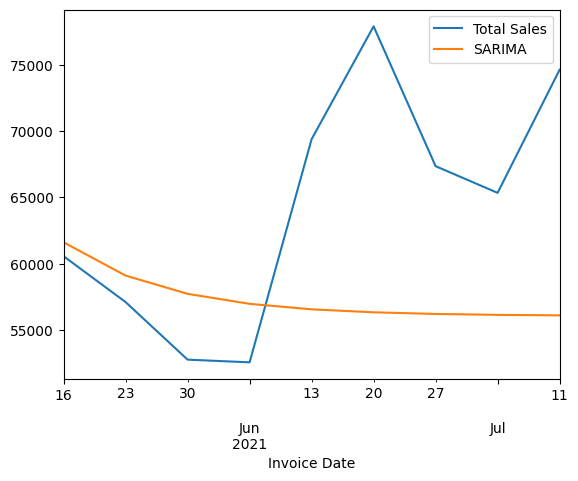

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions.plot(legend=True)



#SARIMAX

In [ ]:
encoded_df.shape

(79, 125)

In [ ]:
encoded_df.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
train = encoded_df[:70]
test = encoded_df[70:]

In [ ]:
encoded_df.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
selected_cols = ['3-week-SMA'	,'6-week-SMA',	'12-week-SMA',	'EWMA',	'SES7'	,'DES7',	'TES7', '2-week-SMA']

In [ ]:
train.drop(selected_cols, axis = 1, inplace = True)

In [ ]:
len(train.columns)

117

In [ ]:
train.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'City_San Francisco', 'City_Seattle', 'City_Sioux Falls',
       'City_St. Louis', 'City_Wichita', 'City_Wilmington',
       'Product_Women's Athletic Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=117)

In [ ]:
model = SARIMAX(train['Total Sales'],exog=train.iloc[: ,7:57],order=(1,1,1),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   70
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -798.877
Date:                Mon, 07 Aug 2023   AIC                           1703.754
Time:                        06:59:30   BIC                           1822.161
Sample:                             0   HQIC                          1750.730
                                 - 70                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Region_Northeast      7.221e+04    4.5e+05      0.161      0.872   -8.09e+05    9.53e+05
Region_South         -3.414e+04   7.51e+05     -0.045      0.964   -1.51e+06    1.44e+06
Region_Southeast      1.172e+05   5.33e+05      0.220      0.826   -9.27e+05    1.16e+06
Region_West           7.455e+04   1.46e+05      0.512      0.609   -2.11e+05     3.6e+05
State_Alabama        -4.828e-10        nan        nan        nan         nan         nan
State_Alaska         -1.159e+05   3.17e+05     -0.365      0.715   -7.38e+05    5.06e+05
State_Arizona         1.885e+05   1.17e+06      0.161      0.872    -2.1e+06    2.48e+06
State_Arkansas        6.833e+04   5.26e+05      0.130      0.897   -9.62e+05     1.1e+06
State_California       1.27e+04   4.58e+04      0.277      0.782   -7.71e+04    1.02e+05
State_Colorado       -4.377e+04   1.37e+04     -3.193      0.001   -7.06e+04   -1.69e+04
State_Connecticut     -1.61e+05   9.38e+05     -0.172      0.864      -2e+06    1.68e+06
State_Delaware        -3.06e+04   2.62e+05     -0.117      0.907   -5.45e+05    4.84e+05
State_Florida         2.005e+04   5.29e+05      0.038      0.970   -1.02e+06    1.06e+06
State_Georgia         3.933e+04   5.01e+05      0.078      0.937   -9.43e+05    1.02e+06
State_Hawaii         -1.319e+05   4.12e+05     -0.320      0.749    -9.4e+05    6.76e+05
State_Idaho          -1.314e+04   5.59e+05     -0.024      0.981   -1.11e+06    1.08e+06
State_Illinois       -1.119e-09        nan        nan        nan         nan         nan
State_Indiana        -1.319e+05   4.12e+05     -0.320      0.749    -9.4e+05    6.76e+05
State_Iowa            5.517e+04   1.28e+06      0.043      0.966   -2.46e+06    2.57e+06
State_Kansas          4.214e+04   4.15e+05      0.102      0.919    -7.7e+05    8.55e+05
State_Kentucky       -5.016e+04   3.63e+05     -0.138      0.890   -7.62e+05    6.62e+05
State_Louisiana      -6.906e+04   4.61e+05     -0.150      0.881   -9.73e+05    8.35e+05
State_Maine           4.946e+05   2.52e+05      1.964      0.050    1053.973    9.88e+05
State_Maryland       -9.995e+04   3.48e+05     -0.287      0.774   -7.83e+05    5.83e+05
State_Massachusetts  -2.201e+04   6.52e+05     -0.034      0.973    -1.3e+06    1.26e+06
State_Michigan        1.968e+04   3.49e+05      0.056      0.955   -6.63e+05    7.03e+05
State_Minnesota       2.587e+04   1.46e+05      0.177      0.860   -2.61e+05    3.13e+05
State_Mississippi     2.952e+04   5.23e+05      0.056      0.955   -9.95e+05    1.05e+06
State_Missouri       -3.011e+04   4.78e+05     -0.063      0.950   -9.66e+05    9.06e+05
State_Montana        -2.702e+05    7.3e+05     -0.370      0.711    -1.7e+06    1.16e+06
State_Nebraska                0         -0        nan        nan           0           0
State_Nevada         -7.639e+04   2.22e+04     -3.433      0.001    -1.2e+05   -3.28e+04
State_New Hampshire   2.952e+04   5.23e+05      0.056      0.955   -9.95e+05    1.05e+06
State_New Jersey     -2334.3964   2.9

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test.iloc[:, 7:57]).rename('SARIMAX Predictions')

In [ ]:
test_data.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:

test_data['Total Sales']


Invoice Date
2021-05-16    60553.300000
2021-05-23    57096.064516
2021-05-30    52756.850000
2021-06-06    52555.882353
2021-06-13    69370.647059
2021-06-20    77879.827586
2021-06-27    67340.900000
2021-07-04    65327.636364
2021-07-11    74607.315789
Name: Total Sales, dtype: float64

In [ ]:
predictions

70    30207.779052
71    35690.079358
72    49360.673737
73    92427.184054
74    56179.425415
75    57754.110343
76    50540.773951
77    76419.316383
78    48693.046990
Name: SARIMAX Predictions, dtype: float64

In [ ]:
error

22696.532544879494

In [ ]:
test_data['Total Sales'].mean()

64165.38040746785

In [ ]:
date_range = pd.date_range(start='2021-05-16', periods = 9, freq='W')

In [ ]:
series = pd.Series(data=predictions.values, index=date_range)

In [ ]:
predictions = series.rename('SARIMAX')

<Axes: xlabel='Invoice Date'>

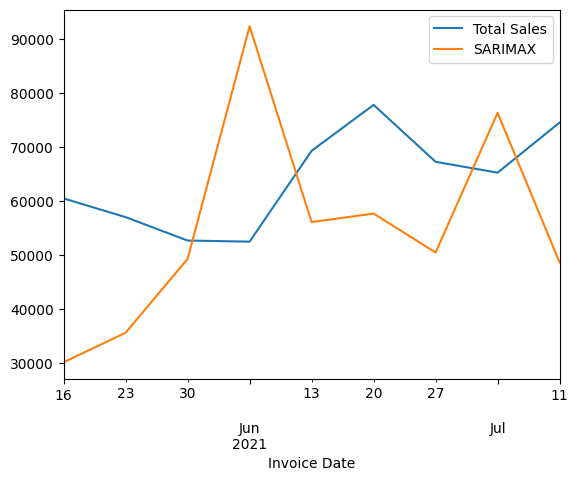

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)


# VAR, VARIMA



VAR

In [ ]:
transformed_df = encoded_df[['Price per Unit', 'Total Sales']]

In [ ]:
train_data = transformed_df.iloc[:70]
test_data = transformed_df.iloc[70:]

In [ ]:
test_data.iloc[0]

Price per Unit       40.425
Total Sales       60553.300
Name: 2021-05-16 00:00:00, dtype: float64

In [ ]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(transformed_df)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  24.28197535859395
BIC:  24.463260652954688

Order = 2
AIC:  24.37366035094655
BIC:  24.678050665473005

Order = 3
AIC:  24.45484269712052
BIC:  24.88418831243642

Order = 4
AIC:  24.483335259952774
BIC:  25.039532407201488

Order = 5
AIC:  24.595552140302736
BIC:  25.280544465309383

Order = 6
AIC:  24.673125561743745
BIC:  25.48890563667331

Order = 7
AIC:  24.743092329302918
BIC:  25.691703212226276




## Fit the VAR(1) Model

In [ ]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Aug, 2023
Time:                     06:59:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    24.4633
Nobs:                     78.0000    HQIC:                   24.3545
Log likelihood:          -1162.35    FPE:                3.51205e+10
AIC:                      24.2820    Det(Omega_mle):     3.25672e+10
--------------------------------------------------------------------
Results for equation Price per Unit
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     9.514527         3.718341            2.559           0.011
L1.Price per Unit         0.817312         0.112608            7.258           0.000
L1.Total Sales           -0.000016 

In [ ]:
lag_order = results.k_ar
lag_order

1

In [ ]:
z = results.forecast(y=train_data.values[-lag_order:], steps=10)
z

array([[3.98353642e+01, 6.99035876e+04],
       [4.09741198e+01, 7.35207719e+04],
       [4.18480053e+01, 7.67181750e+04],
       [4.25120050e+01, 7.93983413e+04],
       [4.30125894e+01, 8.15694761e+04],
       [4.33876104e+01, 8.32871699e+04],
       [4.36671312e+01, 8.46229761e+04],
       [4.38745989e+01, 8.56484458e+04],
       [4.40280526e+01, 8.64278409e+04],
       [4.41412264e+01, 8.70155519e+04]])

In [ ]:
test_data

,Price per Unit,Total Sales
Invoice Date,,
2021-05-16,40.425000,60553.300000
2021-05-23,41.677419,57096.064516
2021-05-30,41.050000,52756.850000
2021-06-06,36.588235,52555.882353
2021-06-13,39.588235,69370.647059
2021-06-20,47.000000,77879.827586
2021-06-27,47.000000,67340.900000
2021-07-04,41.090909,65327.636364
2021-07-11,41.236842,74607.315789


In [ ]:
idx = pd.date_range('2021-05-16', periods=10, freq='W')
df_forecast = pd.DataFrame(z, index=idx, columns=['Price Per Unit','Total Sales'])
df_forecast

,Price Per Unit,Total Sales
2021-05-16,39.835364,69903.587587
2021-05-23,40.974120,73520.771935
2021-05-30,41.848005,76718.175042
2021-06-06,42.512005,79398.341296
2021-06-13,43.012589,81569.476113
2021-06-20,43.387610,83287.169874
2021-06-27,43.667131,84622.976146
2021-07-04,43.874599,85648.445798
2021-07-11,44.028053,86427.840896
2021-07-18,44.141226,87015.551912


## Plot the results
The VARResults object offers a couple of quick plotting tools:

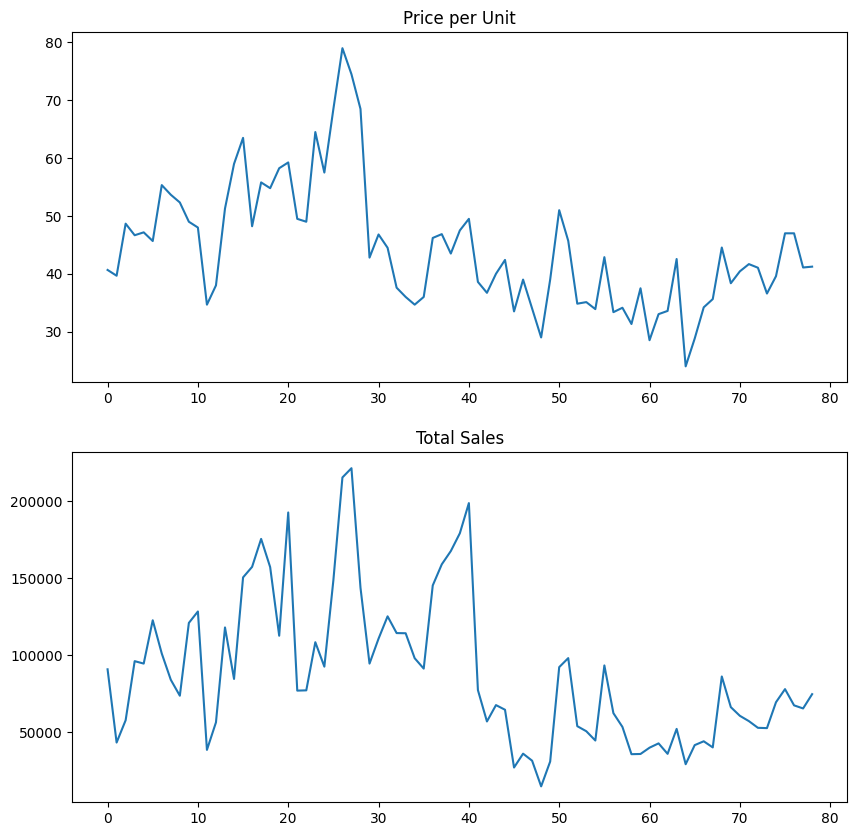

In [ ]:
results.plot();

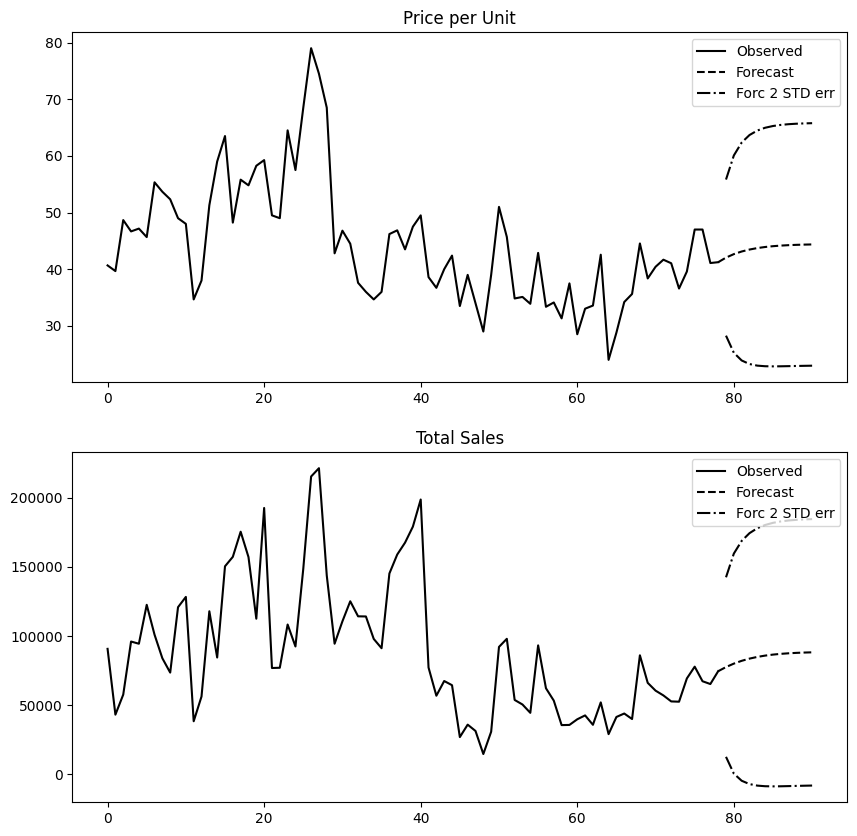

In [ ]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

In [ ]:
transformed_df

,Price per Unit,Total Sales
Invoice Date,,
2020-01-05,40.666667,90757.333333
2020-01-12,39.666667,43185.333333
2020-01-19,48.666667,57671.000000
2020-01-26,46.666667,96045.833333
2020-02-02,47.166667,94465.500000
...,...,...
2021-06-13,39.588235,69370.647059
2021-06-20,47.000000,77879.827586
2021-06-27,47.000000,67340.900000


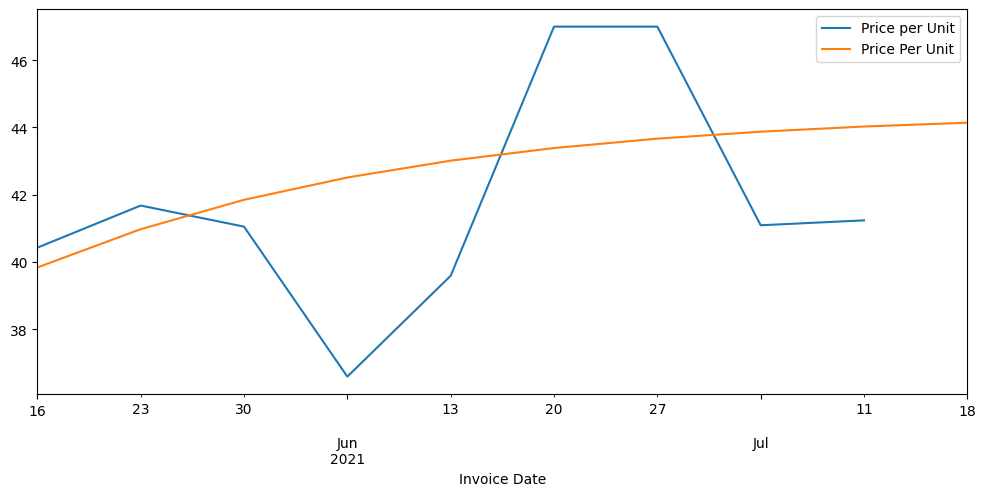

In [ ]:
transformed_df['Price per Unit']['2021-05-16':'2021-07-18	'].plot(figsize=(12,5),legend=True)
df_forecast['Price Per Unit'].plot(legend=True);

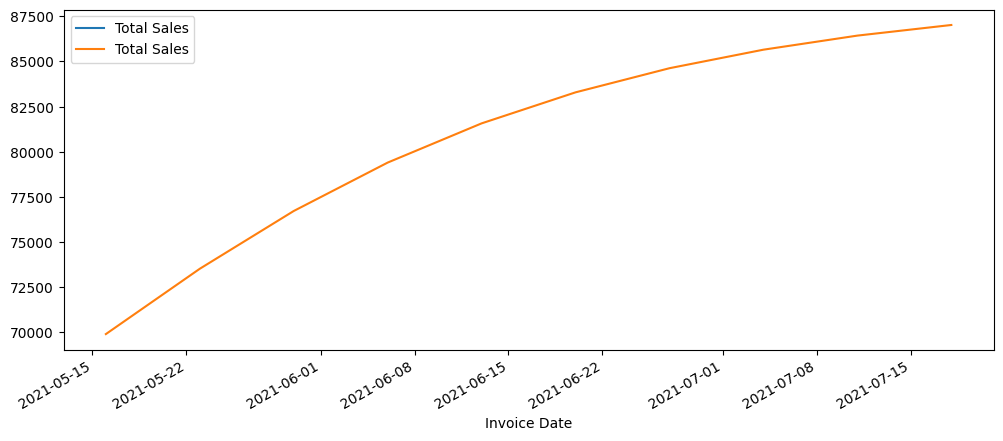

In [ ]:
transformed_df['Total Sales']['2021-10-03':'2021-12-05'].plot(figsize=(12,5),legend=True)
df_forecast['Total Sales'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
transformed_df

,Price per Unit,Total Sales
Invoice Date,,
2020-01-05,40.666667,90757.333333
2020-01-12,39.666667,43185.333333
2020-01-19,48.666667,57671.000000
2020-01-26,46.666667,96045.833333
2020-02-02,47.166667,94465.500000
...,...,...
2021-06-13,39.588235,69370.647059
2021-06-20,47.000000,77879.827586
2021-06-27,47.000000,67340.900000


In [ ]:
df_forecast

,Price Per Unit,Total Sales
2021-05-16,39.835364,69903.587587
2021-05-23,40.974120,73520.771935
2021-05-30,41.848005,76718.175042
2021-06-06,42.512005,79398.341296
2021-06-13,43.012589,81569.476113
2021-06-20,43.387610,83287.169874
2021-06-27,43.667131,84622.976146
2021-07-04,43.874599,85648.445798
2021-07-11,44.028053,86427.840896
2021-07-18,44.141226,87015.551912


In [ ]:
RMSE1 = rmse(transformed_df['Price per Unit']['2021-05-16':'2021-07-11'], df_forecast['Price Per Unit'][:-1])
RMSE1

3.1268287225115006

In [ ]:
RMSE2 = rmse(transformed_df['Total Sales']['2021-05-16':'2021-07-11'], df_forecast['Price Per Unit'][:-1])
RMSE2

64695.0895545754

In [ ]:
transformed_df['Price per Unit'].mean()


44.34660467807619

In [ ]:
transformed_df['Total Sales'].mean()

88816.00570100691

#Facebook Prophet Forecasting

In [ ]:
original = pd.read_excel('/content/Women Athletic Wear.xlsx')

In [ ]:
original

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.00,0.35,In-store
1,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129937.50,0.35,Outlet
2,Foot Locker,1185732,2020-01-28,Northeast,New York,New York,Women's Athletic Footwear,45,800,360000,126000.00,0.35,Outlet
3,Foot Locker,1185732,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129937.50,0.35,Outlet
4,Foot Locker,1185732,2020-02-09,Northeast,New York,New York,Women's Athletic Footwear,50,850,425000,148750.00,0.35,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Amazon,1185732,2021-09-17,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,41,74,3034,1122.58,0.37,Outlet
1602,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,44,61,2684,858.88,0.32,Outlet
1603,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,43,114,4902,1666.68,0.34,Outlet
1604,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,49,116,5684,1989.40,0.35,Outlet


In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
original_df = pd.get_dummies(original, columns=columns_to_encode)
print(list(original_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
original_df.index = pd.to_datetime(original_df.index)
original_df.set_index('Invoice Date', inplace = True)

In [ ]:
original_df = original_df.resample(rule = 'W').mean()

In [ ]:
original_df

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1.157016e+06,40.666667,309.166667,90757.333333,32108.573333,0.406667,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-12,1.128299e+06,39.666667,144.666667,43185.333333,15285.253333,0.406667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-19,1.128299e+06,48.666667,159.000000,57671.000000,20429.110000,0.410000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-26,1.157016e+06,46.666667,290.666667,96045.833333,33984.340000,0.406667,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-02-02,1.157016e+06,47.166667,291.833333,94465.500000,35075.850000,0.435000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,1.187867e+06,52.058824,238.705882,102448.823529,38068.753529,0.430000,0.235294,0.352941,0.000000,0.235294,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
2021-12-12,1.178427e+06,49.111111,199.722222,81171.138889,28353.431389,0.414167,0.277778,0.444444,0.000000,0.083333,...,0.0,0.0,0.055556,0.000000,0.055556,0.000000,1.0,0.222222,0.527778,0.250000
2021-12-19,1.177732e+06,54.205882,214.941176,91146.176471,33043.213235,0.415000,0.117647,0.441176,0.352941,0.088235,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529


In [ ]:
df = original_df['Total Sales'].copy()

In [ ]:
original_df.reset_index(drop=False, inplace=True)


In [ ]:
original_df

,Invoice Date,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,2020-01-05,1.157016e+06,40.666667,309.166667,90757.333333,32108.573333,0.406667,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
1,2020-01-12,1.128299e+06,39.666667,144.666667,43185.333333,15285.253333,0.406667,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2,2020-01-19,1.128299e+06,48.666667,159.000000,57671.000000,20429.110000,0.410000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
3,2020-01-26,1.157016e+06,46.666667,290.666667,96045.833333,33984.340000,0.406667,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
4,2020-02-02,1.157016e+06,47.166667,291.833333,94465.500000,35075.850000,0.435000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,52.058824,238.705882,102448.823529,38068.753529,0.430000,0.235294,0.352941,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
101,2021-12-12,1.178427e+06,49.111111,199.722222,81171.138889,28353.431389,0.414167,0.277778,0.444444,0.000000,...,0.0,0.0,0.055556,0.000000,0.055556,0.000000,1.0,0.222222,0.527778,0.250000
102,2021-12-19,1.177732e+06,54.205882,214.941176,91146.176471,33043.213235,0.415000,0.117647,0.441176,0.352941,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529
103,2021-12-26,1.152913e+06,52.476190,201.619048,81903.619048,29326.430000,0.413333,0.000000,0.333333,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.523810,0.333333


In [ ]:
selected_columns = ['Invoice Date', 'Total Sales']

In [ ]:
df = original_df[selected_columns].copy()

In [ ]:
df

,Invoice Date,Total Sales
0,2020-01-05,90757.333333
1,2020-01-12,43185.333333
2,2020-01-19,57671.000000
3,2020-01-26,96045.833333
4,2020-02-02,94465.500000
...,...,...
100,2021-12-05,102448.823529
101,2021-12-12,81171.138889
102,2021-12-19,91146.176471
103,2021-12-26,81903.619048


In [ ]:
df.columns = ['ds', 'y']

In [ ]:
train = df.iloc[:90]
test = df.iloc[90:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=10,freq='W')
forecast = m.predict(future)

2023-08-07 06:59:34,079 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 06:59:34,082 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 06:59:34,083 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
06:59:34 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 06:59:34,112 - INFO     - Chain [1] start processing
06:59:34 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 06:59:34,286 - INFO     - Chain [1] done processing


In [ ]:
future

,ds
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02
...,...
95,2021-10-31
96,2021-11-07
97,2021-11-14
98,2021-11-21


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,122629.012800,65769.518446,173647.815033,122629.012800,122629.012800,0.0,0.0,0.0,0.0,0.0,0.0,122629.012800
1,2020-01-12,121810.567777,69406.422957,175423.357524,121810.567777,121810.567777,0.0,0.0,0.0,0.0,0.0,0.0,121810.567777
2,2020-01-19,120992.122754,68867.572281,174139.657876,120992.122754,120992.122754,0.0,0.0,0.0,0.0,0.0,0.0,120992.122754
3,2020-01-26,120173.677731,65192.909320,176112.047944,120173.677731,120173.677731,0.0,0.0,0.0,0.0,0.0,0.0,120173.677731
4,2020-02-02,119355.232709,71251.077609,171563.583182,119355.232709,119355.232709,0.0,0.0,0.0,0.0,0.0,0.0,119355.232709


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2021-10-31,44876.368013,-12832.218255,95005.543075,44876.366570,44876.369593,0.0,0.0,0.0,0.0,0.0,0.0,44876.368013
96,2021-11-07,44057.918038,-9331.280035,97871.822961,44057.916178,44057.920083,0.0,0.0,0.0,0.0,0.0,0.0,44057.918038
97,2021-11-14,43239.468064,-6095.141566,101096.307608,43239.465724,43239.470655,0.0,0.0,0.0,0.0,0.0,0.0,43239.468064
98,2021-11-21,42421.018089,-8341.727192,92014.992985,42421.015270,42421.021140,0.0,0.0,0.0,0.0,0.0,0.0,42421.018089
99,2021-11-28,41602.568114,-9599.347632,94921.504881,41602.564839,41602.571819,0.0,0.0,0.0,0.0,0.0,0.0,41602.568114


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
88,2021-09-12,50605.517835,-3741.886694,105922.708927
89,2021-09-19,49787.067861,-3337.595091,100037.146324
90,2021-09-26,48968.617886,-4773.648393,103476.792958
91,2021-10-03,48150.167911,-5726.508084,101196.039198
92,2021-10-10,47331.717937,-7822.675742,97149.507960
93,2021-10-17,46513.267962,-10689.665432,99713.550330
94,2021-10-24,45694.817987,-6510.404551,101700.192365
95,2021-10-31,44876.368013,-12832.218255,95005.543075
96,2021-11-07,44057.918038,-9331.280035,97871.822961
97,2021-11-14,43239.468064,-6095.141566,101096.307608


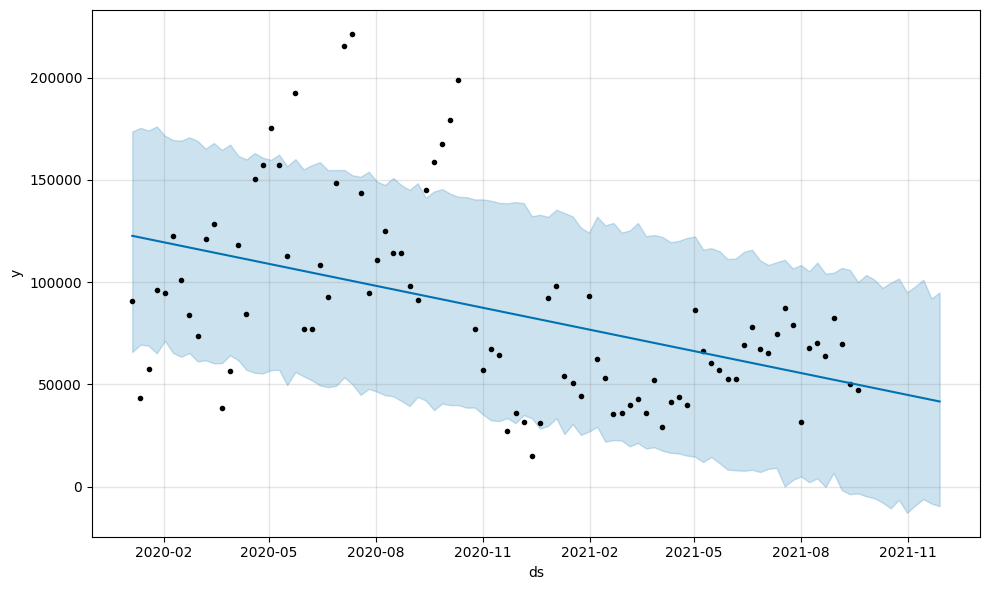

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast);

<Axes: xlabel='ds'>

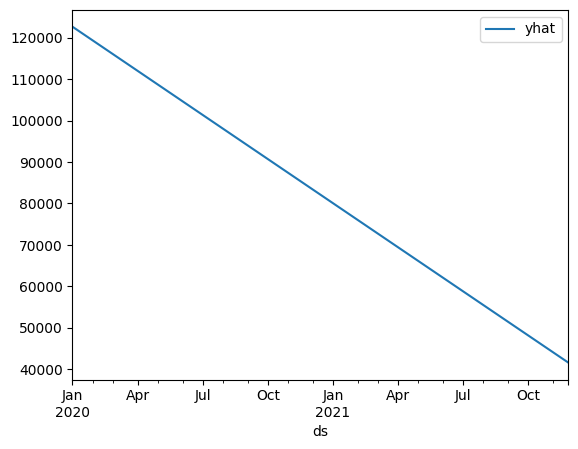

In [ ]:
forecast.plot(x='ds',y='yhat')

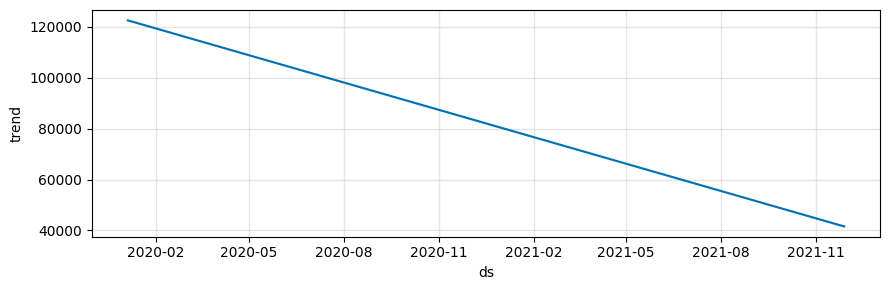

In [ ]:
m.plot_components(forecast);



<Axes: xlabel='ds'>

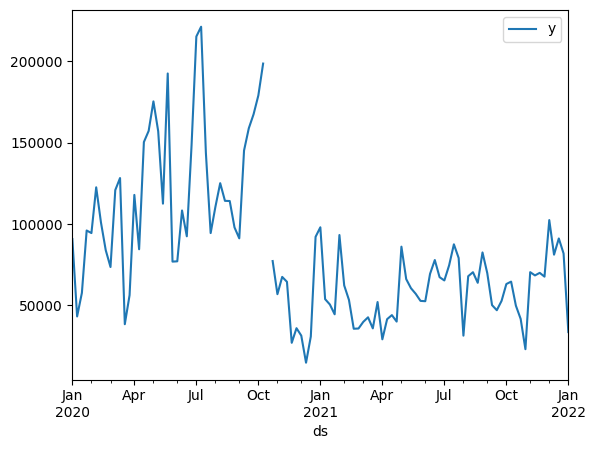

In [ ]:
df.plot(x= 'ds', y = 'y')

<Axes: xlabel='ds'>

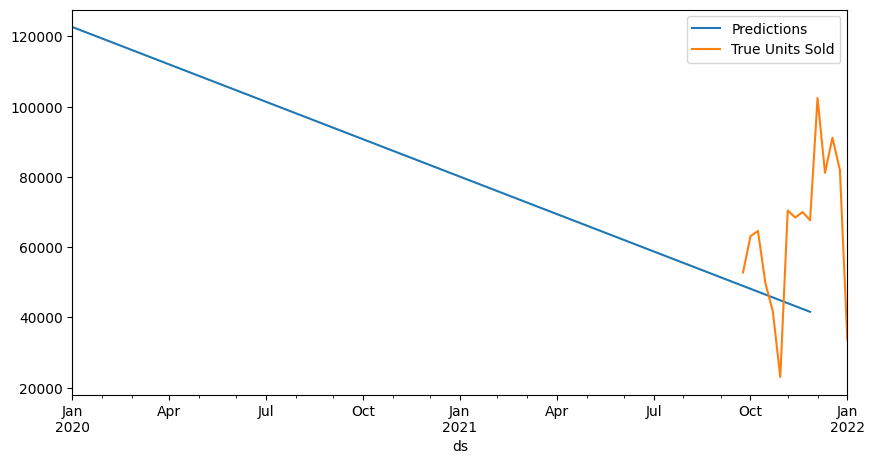

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(10,5))
test.plot(x='ds',y='y',label='True Units Sold',legend=True,ax=ax)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[90:104]['yhat']

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,122629.012800,65769.518446,173647.815033,122629.012800,122629.012800,0.0,0.0,0.0,0.0,0.0,0.0,122629.012800
1,2020-01-12,121810.567777,69406.422957,175423.357524,121810.567777,121810.567777,0.0,0.0,0.0,0.0,0.0,0.0,121810.567777
2,2020-01-19,120992.122754,68867.572281,174139.657876,120992.122754,120992.122754,0.0,0.0,0.0,0.0,0.0,0.0,120992.122754
3,2020-01-26,120173.677731,65192.909320,176112.047944,120173.677731,120173.677731,0.0,0.0,0.0,0.0,0.0,0.0,120173.677731
4,2020-02-02,119355.232709,71251.077609,171563.583182,119355.232709,119355.232709,0.0,0.0,0.0,0.0,0.0,0.0,119355.232709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,44876.368013,-12832.218255,95005.543075,44876.366570,44876.369593,0.0,0.0,0.0,0.0,0.0,0.0,44876.368013
96,2021-11-07,44057.918038,-9331.280035,97871.822961,44057.916178,44057.920083,0.0,0.0,0.0,0.0,0.0,0.0,44057.918038
97,2021-11-14,43239.468064,-6095.141566,101096.307608,43239.465724,43239.470655,0.0,0.0,0.0,0.0,0.0,0.0,43239.468064
98,2021-11-21,42421.018089,-8341.727192,92014.992985,42421.015270,42421.021140,0.0,0.0,0.0,0.0,0.0,0.0,42421.018089


In [ ]:
predictions

90    48968.617886
91    48150.167911
92    47331.717937
93    46513.267962
94    45694.817987
95    44876.368013
96    44057.918038
97    43239.468064
98    42421.018089
99    41602.568114
Name: yhat, dtype: float64

In [ ]:
test['y']

90      52779.523810
91      63115.928571
92      64609.419355
93      49821.263158
94      41698.861111
95      23050.454545
96      70422.166667
97      68424.891892
98      69986.771429
99      67663.058824
100    102448.823529
101     81171.138889
102     91146.176471
103     81903.619048
104     33580.600000
Name: y, dtype: float64

In [ ]:
test['y'].iloc[-1]


33580.6

In [ ]:
predictions

90    48968.617886
91    48150.167911
92    47331.717937
93    46513.267962
94    45694.817987
95    44876.368013
96    44057.918038
97    43239.468064
98    42421.018089
99    41602.568114
Name: yhat, dtype: float64

In [ ]:
test['y']

90      52779.523810
91      63115.928571
92      64609.419355
93      49821.263158
94      41698.861111
95      23050.454545
96      70422.166667
97      68424.891892
98      69986.771429
99      67663.058824
100    102448.823529
101     81171.138889
102     91146.176471
103     81903.619048
104     33580.600000
Name: y, dtype: float64

In [ ]:
test['y'][0:10]

90    52779.523810
91    63115.928571
92    64609.419355
93    49821.263158
94    41698.861111
95    23050.454545
96    70422.166667
97    68424.891892
98    69986.771429
99    67663.058824
Name: y, dtype: float64

In [ ]:
rmse(predictions,test['y'][0:10])

19515.880910098298

In [ ]:
test['y'].mean()

64121.51315316126

#Multivariate Forecasting

In [ ]:
original_df

,Invoice Date,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,2020-01-05,1.157016e+06,40.666667,309.166667,90757.333333,32108.573333,0.406667,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
1,2020-01-12,1.128299e+06,39.666667,144.666667,43185.333333,15285.253333,0.406667,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2,2020-01-19,1.128299e+06,48.666667,159.000000,57671.000000,20429.110000,0.410000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
3,2020-01-26,1.157016e+06,46.666667,290.666667,96045.833333,33984.340000,0.406667,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
4,2020-02-02,1.157016e+06,47.166667,291.833333,94465.500000,35075.850000,0.435000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,52.058824,238.705882,102448.823529,38068.753529,0.430000,0.235294,0.352941,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
101,2021-12-12,1.178427e+06,49.111111,199.722222,81171.138889,28353.431389,0.414167,0.277778,0.444444,0.000000,...,0.0,0.0,0.055556,0.000000,0.055556,0.000000,1.0,0.222222,0.527778,0.250000
102,2021-12-19,1.177732e+06,54.205882,214.941176,91146.176471,33043.213235,0.415000,0.117647,0.441176,0.352941,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529
103,2021-12-26,1.152913e+06,52.476190,201.619048,81903.619048,29326.430000,0.413333,0.000000,0.333333,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.523810,0.333333


In [ ]:
original_df.columns

Index(['Invoice Date', 'Retailer ID', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_San Francisco', 'City_Seattle', 'City_Sioux Falls',
       'City_St. Louis', 'City_Wichita', 'City_Wilmington',
       'Product_Women's Athletic Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=118)

In [ ]:
new_column_names = {
    'Invoice Date': 'ds',
    'Total Sales': 'y'
}
original_df.rename(columns=new_column_names, inplace=True)

original_df['y_original'] = original_df['y'].copy()

In [ ]:
train = original_df[:90]
test = original_df[90:]

In [ ]:
train

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
0,2020-01-05,1.157016e+06,40.666667,309.166667,90757.333333,32108.573333,0.406667,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,90757.333333
1,2020-01-12,1.128299e+06,39.666667,144.666667,43185.333333,15285.253333,0.406667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,43185.333333
2,2020-01-19,1.128299e+06,48.666667,159.000000,57671.000000,20429.110000,0.410000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,57671.000000
3,2020-01-26,1.157016e+06,46.666667,290.666667,96045.833333,33984.340000,0.406667,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,96045.833333
4,2020-02-02,1.157016e+06,47.166667,291.833333,94465.500000,35075.850000,0.435000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,94465.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-08-22,1.181550e+06,40.948718,204.794872,63878.435897,24293.110513,0.450513,0.102564,0.179487,0.538462,...,0.0,0.000000,0.051282,0.000000,0.000000,1.0,0.128205,0.512821,0.358974,63878.435897
86,2021-08-29,1.151476e+06,48.611111,233.444444,82553.500000,32090.079444,0.455556,0.000000,0.000000,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.111111,0.444444,0.444444,82553.500000
87,2021-09-05,1.191782e+06,36.222222,246.777778,69816.666667,30094.615556,0.471667,0.111111,0.166667,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.111111,0.555556,0.333333,69816.666667
88,2021-09-12,1.185184e+06,33.060606,186.424242,50157.090909,19668.393333,0.445455,0.303030,0.303030,0.181818,...,0.0,0.000000,0.000000,0.060606,0.000000,1.0,0.272727,0.484848,0.242424,50157.090909


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 119 entries, ds to y_original
dtypes: datetime64[ns](1), float64(118)
memory usage: 97.7 KB


In [ ]:
original_df.columns

Index(['ds', 'Retailer ID', 'Price per Unit', 'Units Sold', 'y',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_Seattle', 'City_Sioux Falls', 'City_St. Louis', 'City_Wichita',
       'City_Wilmington', 'Product_Women's Athletic Footwear',
       'Sales Method_In-store', 'Sales Method_Online', 'Sales Method_Outlet',
       'y_original'],
      dtype='object', length=119)

In [ ]:
m1= Prophet()
m1.add_regressor('Sales Method_Online')
m1.add_regressor('Sales Method_Outlet')
m1.add_regressor('Region_Midwest')
m1.add_regressor('Region_Northeast')
m1.add_regressor('Region_South')
m1.add_regressor('Region_Southeast')
m1.add_regressor('Region_West')
m1.fit(train)



2023-08-07 06:59:37,138 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 06:59:37,140 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 06:59:37,143 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
06:59:37 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 06:59:37,172 - INFO     - Chain [1] start processing
06:59:37 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 06:59:37,367 - INFO     - Chain [1] done processing


In [ ]:
future = m1.make_future_dataframe(periods=7,freq='W')


In [ ]:
m1.component_modes

{'additive': ['Sales Method_Online',
  'Sales Method_Outlet',
  'Region_Midwest',
  'Region_Northeast',
  'Region_South',
  'Region_Southeast',
  'Region_West',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future['Sales Method_Online'] = 1
future['Sales Method_Outlet'] = 1
future['Region_Northeast'] = 1
future['Region_Midwest'] = 0
future['Region_South'] = 0
future['Region_Southeast'] = 0
future['Region_West'] = 0

In [ ]:
future

,ds,Sales Method_Online,Sales Method_Outlet,Region_Northeast,Region_Midwest,Region_South,Region_Southeast,Region_West
0,2020-01-05,1,1,1,0,0,0,0
1,2020-01-12,1,1,1,0,0,0,0
2,2020-01-19,1,1,1,0,0,0,0
3,2020-01-26,1,1,1,0,0,0,0
4,2020-02-02,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
92,2021-10-10,1,1,1,0,0,0,0
93,2021-10-17,1,1,1,0,0,0,0
94,2021-10-24,1,1,1,0,0,0,0
95,2021-10-31,1,1,1,0,0,0,0


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,122629.012800,65769.518446,173647.815033,122629.012800,122629.012800,0.0,0.0,0.0,0.0,0.0,0.0,122629.012800
1,2020-01-12,121810.567777,69406.422957,175423.357524,121810.567777,121810.567777,0.0,0.0,0.0,0.0,0.0,0.0,121810.567777
2,2020-01-19,120992.122754,68867.572281,174139.657876,120992.122754,120992.122754,0.0,0.0,0.0,0.0,0.0,0.0,120992.122754
3,2020-01-26,120173.677731,65192.909320,176112.047944,120173.677731,120173.677731,0.0,0.0,0.0,0.0,0.0,0.0,120173.677731
4,2020-02-02,119355.232709,71251.077609,171563.583182,119355.232709,119355.232709,0.0,0.0,0.0,0.0,0.0,0.0,119355.232709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,44876.368013,-12832.218255,95005.543075,44876.366570,44876.369593,0.0,0.0,0.0,0.0,0.0,0.0,44876.368013
96,2021-11-07,44057.918038,-9331.280035,97871.822961,44057.916178,44057.920083,0.0,0.0,0.0,0.0,0.0,0.0,44057.918038
97,2021-11-14,43239.468064,-6095.141566,101096.307608,43239.465724,43239.470655,0.0,0.0,0.0,0.0,0.0,0.0,43239.468064
98,2021-11-21,42421.018089,-8341.727192,92014.992985,42421.015270,42421.021140,0.0,0.0,0.0,0.0,0.0,0.0,42421.018089


In [ ]:
forecast2 = m1.predict(future)

In [ ]:
test

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Women's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
90,2021-09-26,1.164575e+06,44.428571,155.476190,52779.523810,22903.092381,0.460476,0.000000,0.095238,0.285714,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.476190,0.380952,52779.523810
91,2021-10-03,1.181203e+06,41.285714,199.428571,63115.928571,31188.770714,0.545714,0.142857,0.000000,0.642857,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.071429,0.428571,0.500000,63115.928571
92,2021-10-10,1.185539e+06,44.258065,184.064516,64609.419355,26488.673871,0.446129,0.193548,0.322581,0.193548,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.225806,0.516129,0.258065,64609.419355
93,2021-10-17,1.173721e+06,40.157895,158.578947,49821.263158,19252.859211,0.418421,0.210526,0.263158,0.236842,...,0.0,0.052632,0.000000,0.052632,0.052632,1.0,0.210526,0.526316,0.263158,49821.263158
94,2021-10-24,1.174398e+06,39.027778,140.555556,41698.861111,16273.276389,0.421111,0.055556,0.250000,0.333333,...,0.0,0.000000,0.055556,0.000000,0.000000,1.0,0.111111,0.527778,0.361111,41698.861111
95,2021-10-31,1.170068e+06,37.363636,74.272727,23050.454545,8323.890909,0.421818,0.000000,0.454545,0.272727,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.454545,0.545455,23050.454545
96,2021-11-07,1.187244e+06,45.083333,178.166667,70422.166667,26407.285833,0.425417,0.166667,0.541667,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.208333,0.541667,0.250000,70422.166667
97,2021-11-14,1.178625e+06,45.432432,181.486486,68424.891892,23336.570270,0.395946,0.270270,0.459459,0.000000,...,0.0,0.054054,0.000000,0.054054,0.054054,1.0,0.216216,0.540541,0.243243,68424.891892
98,2021-11-21,1.177960e+06,49.028571,187.057143,69986.771429,24765.812857,0.411143,0.114286,0.400000,0.342857,...,0.0,0.000000,0.057143,0.000000,0.000000,1.0,0.142857,0.514286,0.342857,69986.771429
99,2021-11-28,1.145191e+06,48.235294,186.529412,67663.058824,24539.200588,0.424118,0.000000,0.176471,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.117647,0.529412,0.352941,67663.058824


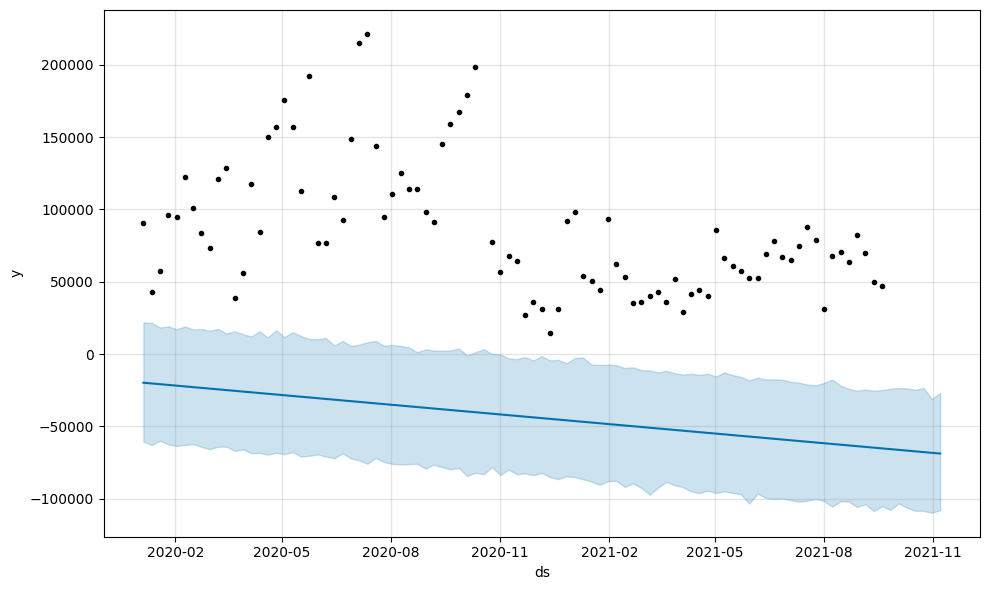

In [ ]:
m1.plot(forecast2);